In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
#from mlxtend.classifier import StackingClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
import seaborn as sns
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import model_selection

In [80]:
#Loading the dataset
data = pd.read_csv(r'C:\Users\vkrishna\data\train.csv')
data.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [81]:
#Separating the Features and Target Variables
X = data.drop(['Claim'],1)
y = data['Claim'].copy()

In [82]:
# Identifying missing values
def missing_datas(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

missing_data = missing_datas(X)
#missing_data.to_csv('~/Desktop/Python/Hackathon/data/missing_data.csv')
print(missing_data)

                      Total    Percent
Gender                36046  71.152783
Age                       0   0.000000
Commision (in value)      0   0.000000
Net Sales                 0   0.000000
Destination               0   0.000000
Duration                  0   0.000000
Product Name              0   0.000000
Distribution Channel      0   0.000000
Agency Type               0   0.000000
Agency                    0   0.000000
ID                        0   0.000000


In [83]:
#drop feature with high missing values
X = X.drop('Gender',1)

In [84]:
#Check numeric and categorical features

# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=['number']).columns
    return numeric_col

# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=['number']).columns
    return categorical_col

#Check numeric columns
numeric_columns = numeric_features(X)
print("Numeric Features:")
print(numeric_columns)
print("===="*20)

#Check categorical columns
categorical_columns = categorical_features(X)
print("Categorical Features:")
print(categorical_columns)

Numeric Features:
Index(['ID', 'Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')
Categorical Features:
Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination'],
      dtype='object')


In [85]:
#Value count of features

#Total No. of Samples
print('Number of Samples:')
print(X.shape[0])
print("===="*20)
#Value count of categorical features

print('Count of Unique categorical Values:')
print(X[categorical_columns].nunique())
print("===="*20)
print('Count of Unique numerical Values:')
print(X[numeric_columns].nunique())

#X[categorical_columns].nunique().to_csv('~/Desktop/Python/Hackathon/data/categorical_count_unique.csv')
#X[numeric_columns].nunique().to_csv('~/Desktop/Python/Hackathon/data/numeric_count_unique.csv')

Number of Samples:
50660
Count of Unique categorical Values:
Agency                   16
Agency Type               2
Distribution Channel      2
Product Name             26
Destination             144
dtype: int64
Count of Unique numerical Values:
ID                      50660
Duration                  444
Net Sales                1053
Commision (in value)      968
Age                        88
dtype: int64


In [86]:
#Drop irrelevant features
X = X.drop('ID',1)

#Recalculating numeric & categorical features
numeric_columns = numeric_features(X)
categorical_columns = categorical_features(X)

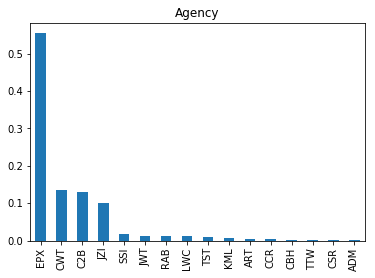

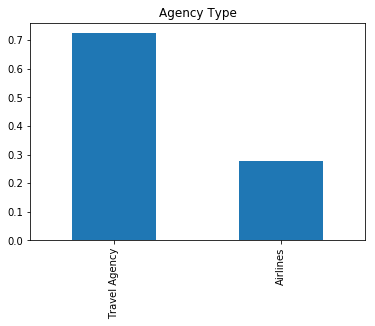

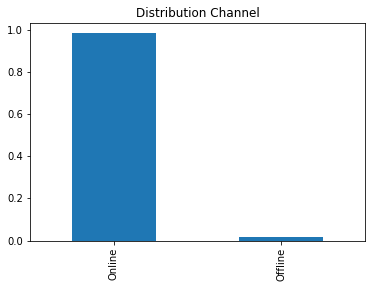

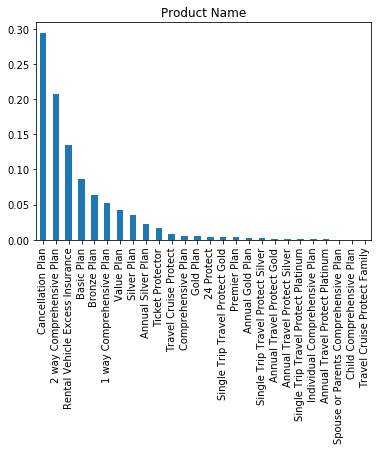

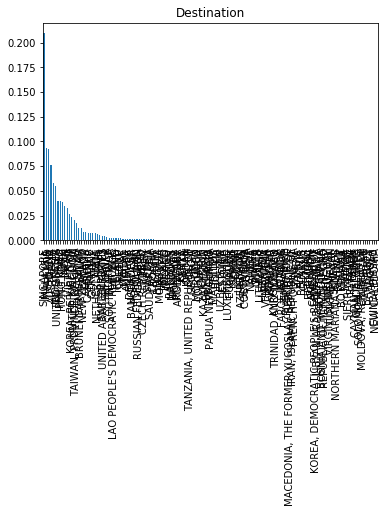

In [87]:
# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(dataframe):
    categorical_columns = categorical_features(dataframe)
    dataframe = dataframe[categorical_columns]
    for i in dataframe:
        plt.title(i)
        dataframe[i].value_counts(normalize=True).plot(kind='bar')
        plt.show()

plot = plot_categorical_columns(X)

C:\Users\vkrishna\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


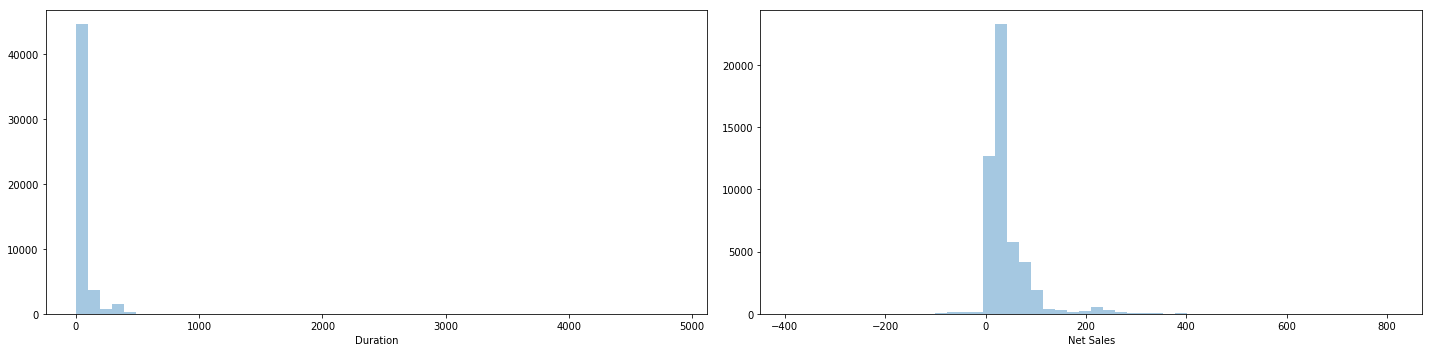

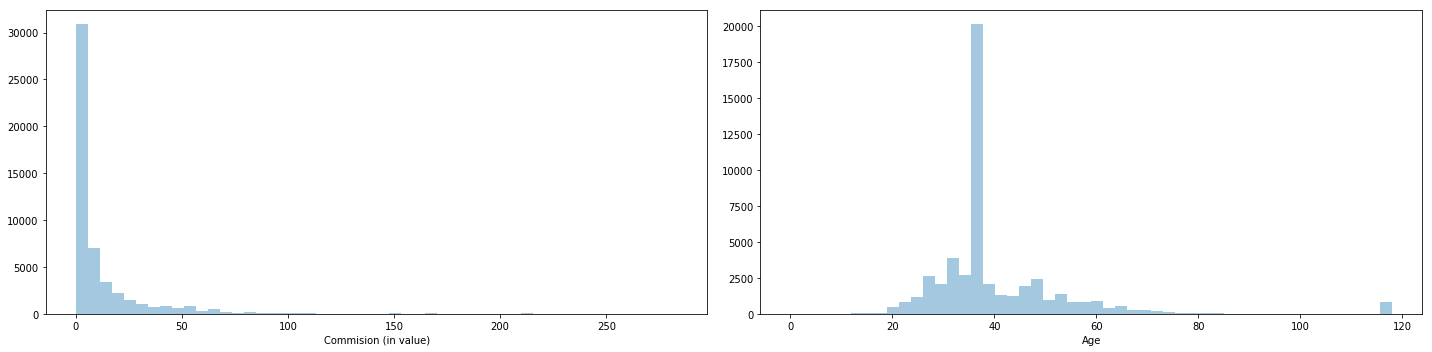

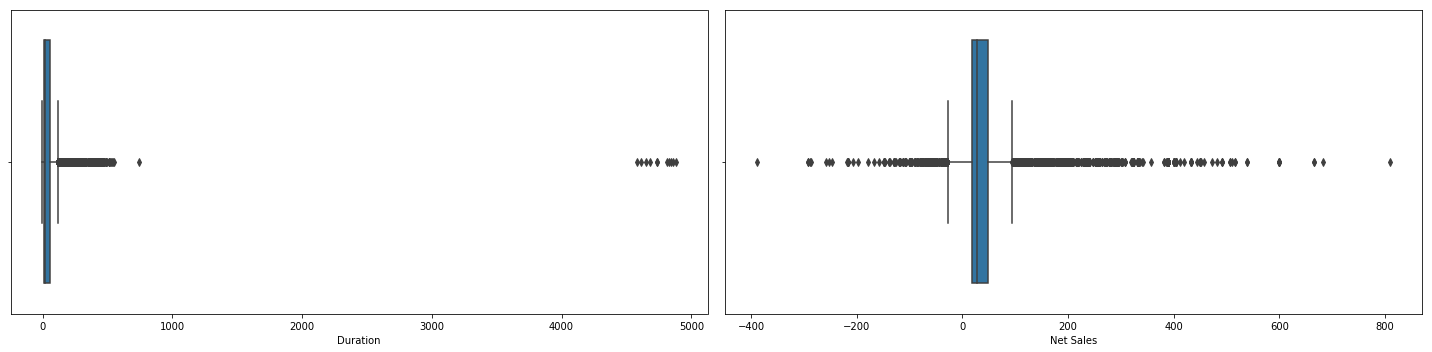

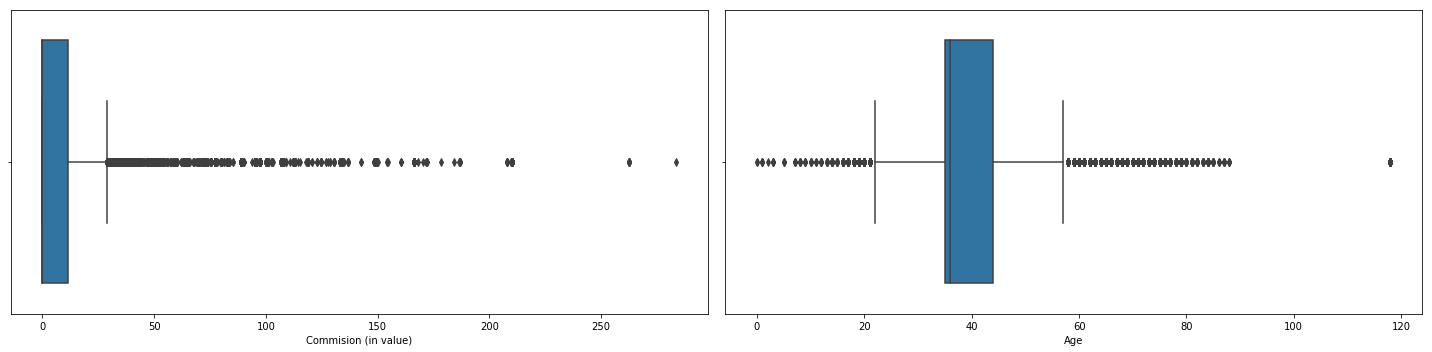

In [88]:
# Function to plot histograms & Boxplots
def plot_continuous_columns(dataframe):
    numeric_columns = numeric_features(dataframe)
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(20,5))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

def plot_box_plots(dataframe):
    numeric_columns = numeric_features(dataframe)
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(20,5))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

plot_continuous_columns(X)          
plot_box_plots(X)

In [89]:
#Removing outliers

X = X[X['Duration']>0]
X = X[X['Duration']<366] 
X = X[X['Age']<=100]

y = y.iloc[X.index]

Highly Correlated Variables


Series([], dtype: float64)

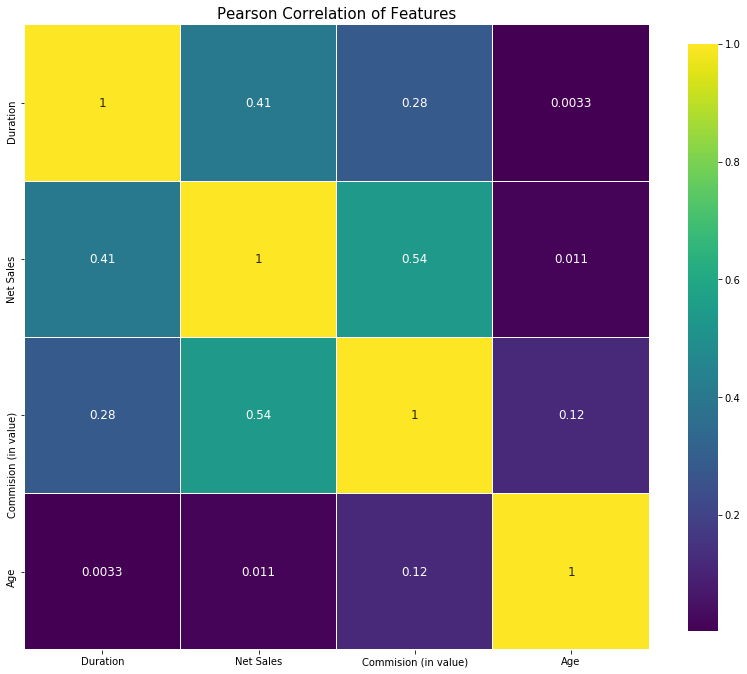

In [90]:
#correlation heatmap of Numeric Features
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = 'viridis',
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
    correlation = df.corr().unstack().sort_values(kind='quicksort')
    print('Highly Correlated Variables')
    return correlation[((correlation>=0.75) | (correlation<=-0.75)) & (correlation!=1)]

correlation_heatmap(X)



In [91]:
# Dataset Preparation for Baseline Models

# Characteristics of Baseline models:
#   Encoding - Label Encomding
#   Charateristic Features - Unbinned
#   Numeric Features - Untransformed and Unscaled
#   Sampling - No Under/Over Sampling
#   Hyper parameters - No Grid Search
#   Baseline models / Estimators - Logistic Regression, Decision Tree, Random Forest
#   Ensembling - No Ensembling
#   Boosting - No boosting
    
#Datasets
X_1 = X.copy()
y_1 = y.copy()

#Label Encoding
le = LabelEncoder()
for cols in categorical_columns:
    X_1[cols] = le.fit_transform(X_1[cols])
    
#Train test split
X_train,X_test,y_train, y_test = train_test_split(X_1,y_1,test_size=0.3,random_state=0)   

In [92]:
#Functions for models
def run_model(xtrain, xtest, ytrain, ytest, model):
    '''
    Performs model training and tests using ROC-AUC and precision 
    returns precision score
    '''
    model.fit(xtrain, ytrain)
    y_scores = model.predict(xtest)
    precision = precision_score(ytest, y_scores)
    confusion = confusion_matrix(ytest, y_scores)
    print(classification_report(ytest,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, y_scores)
    print('Precision Score:',precision_score(ytest, y_scores))
    print('Recall Score:',recall_score(y_test,y_scores))
    print('Roc Auc Score:',roc_auc_score(ytest,y_scores))
    print('Confusion Matrix:\n',confusion)
    
    plt.figure(figsize = (7,5))
    sns.heatmap(confusion, annot=True,cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return precision

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     14435
          1       0.00      0.00      0.00       191

avg / total       0.97      0.99      0.98     14626

Precision Score: 0.0
Recall Score: 0.0
Roc Auc Score: 0.49996536196744024
Confusion Matrix:
 [[14434     1]
 [  191     0]]


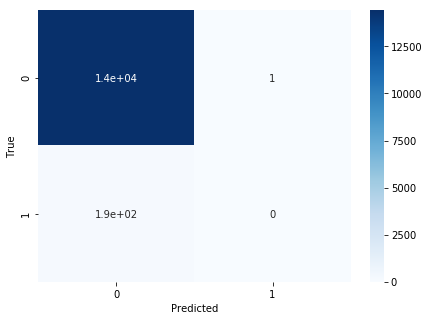

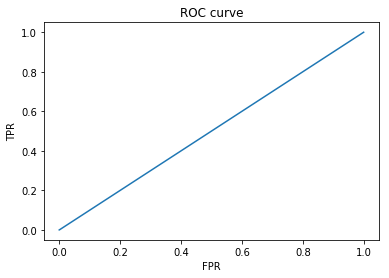

Precision Score = 0.00 %
On Model - 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.99      0.99      0.99     14435
          1       0.06      0.07      0.07       191

avg / total       0.98      0.97      0.97     14626

Precision Score: 0.06334841628959276
Recall Score: 0.07329842931937172
Roc Auc Score: 0.5294791419198175
Confusion Matrix:
 [[14228   207]
 [  177    14]]


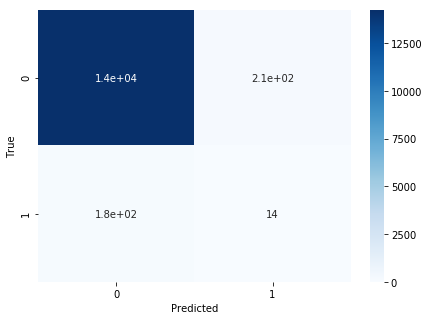

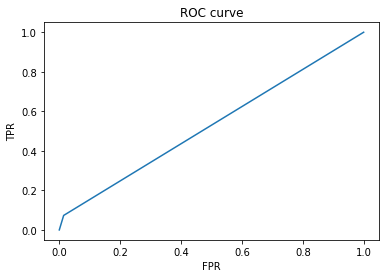

Precision Score = 6.33 %
On Model - 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     14435
          1       0.08      0.02      0.03       191

avg / total       0.98      0.98      0.98     14626

Precision Score: 0.07692307692307693
Recall Score: 0.015706806282722512
Roc Auc Score: 0.5066064339692102
Confusion Matrix:
 [[14399    36]
 [  188     3]]


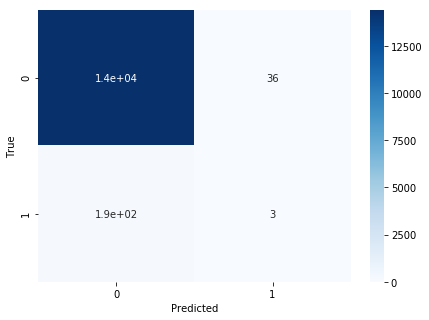

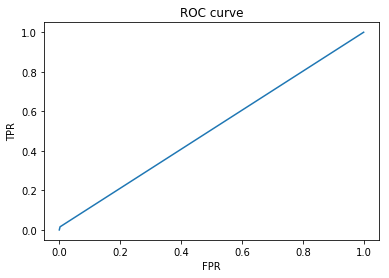

Precision Score = 7.69 %
On Model - 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


KeyboardInterrupt: 

In [74]:
#Baseline Modeling

#Generating scores
lr = LogisticRegression(random_state=0)
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
#xgb = XGBClassifier(random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
gnb = GaussianNB()
svc = SVC(random_state=0)
model_list = [lr,dt,rf,svc,gnb,gbc]

for model in model_list:
    precision = run_model(X_train,X_test,y_train,y_test,model)
    print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(model))
    
    print('===='*20)

             precision    recall  f1-score   support

          0       0.99      0.80      0.89     14435
          1       0.04      0.64      0.08       191

avg / total       0.98      0.80      0.88     14626

Precision Score: 0.04124748490945674
Recall Score: 0.643979057591623
Roc Auc Score: 0.7229593937074844
Confusion Matrix:
 [[11576  2859]
 [   68   123]]


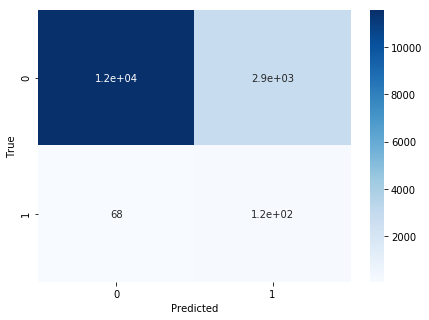

KeyboardInterrupt: 

In [51]:
# Baseline models with Under sampling
under_sampling = [RandomUnderSampler(),ClusterCentroids(),TomekLinks()]
model_list2 = [lr,dt,rf,gnb,svc,gbc]

for model in model_list2:
    for sample in under_sampling:
        X_train2,y_train2 = sample.fit_sample(X_train,y_train)
        precision = run_model(X_train2,X_test,y_train2,y_test,model)
        print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(model)+'%\nOn Sample - \n'+str(sample))
    
        print('===='*20)

In [ ]:
#Baseline xgb separately since it throws a mismatch error due to a bug
xgb = XGBClassifier()
for sample in under_sampling:
    X_train2,y_train2 = sample.fit_sample(X_train,y_train)
    X_test2 = X_test.values
    xgb.fit(X_train2,y_train2)
    y_scores = xgb.predict(X_test2)
    precision = precision_score(y_test, y_scores)
    confusion = confusion_matrix(y_test, y_scores)
    print(classification_report(y_test,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
    print('Precision Score:',precision_score(y_test, y_scores))
    print('Recall Score:',recall_score(y_test, y_scores))
    print('Roc Auc Score:',roc_auc_score(y_test,y_scores))
    print('Confusion Matrix:\n',confusion)
    plt.figure(figsize = (7,5))
    sns.heatmap(confusion, annot=True,cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
    print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(xgb)+'%\nOn Sample - \n'+str(sample))
    print('===='*20)

In [ ]:
#Baseline models with Over Sampling

over_sampling = [RandomOverSampler(),SMOTE()]
for model in model_list2:
    for sample in over_sampling:
        X_train2,y_train2 = sample.fit_sample(X_train,y_train)
        precision = run_model(X_train2,X_test,y_train2,y_test,model)
        print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(model)+'%\nOn Sample - \n'+str(sample))
    
        print('===='*20)

In [ ]:
#Baseline xgb separately since it throws a mismatch error due to a bug
xgb = XGBClassifier()
for sample in over_sampling:
    X_train2,y_train2 = sample.fit_sample(X_train,y_train)
    X_test2 = X_test.values
    xgb.fit(X_train2,y_train2)
    y_scores = xgb.predict(X_test2)
    precision = precision_score(y_test, y_scores)
    confusion = confusion_matrix(y_test, y_scores)
    print(classification_report(y_test,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
    print('Precision Score:',precision_score(y_test, y_scores))
    print('Recall Score:',recall_score(y_test,y_scores))
    print('Roc Auc Score:',roc_auc_score(y_test,y_scores))
    print('Confusion Matrix:\n',confusion)
    plt.figure(figsize = (7,5))
    sns.heatmap(confusion, annot=True,cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
    print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(xgb)+'%\nOn Sample - \n'+str(sample))
    print('===='*20)

In [93]:
#Grouping and LE+OHO

country_list = pd.read_csv(r'C:\Users\vkrishna\data\country_list.csv')
X_2 = X.merge(country_list,on='Destination')
X_2 = X_2.drop('Destination',1)
le_col = ['Agency','Agency Type','Distribution Channel']
oho_col = ['Product Name','Region']

for col in le_col:
    X_2[col] = le.fit_transform(X_2[col])

dummies = pd.get_dummies(X_2[oho_col])
X_2 = pd.concat([X_2,dummies],axis=1)
X_2 = X_2.drop(oho_col,1)

y_2 = y.copy()

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X_2,y_2,test_size=0.3,random_state=0)
print(np.isfinite(X_2))

       Agency  Agency Type  Distribution Channel  Duration  Net Sales  \
0        True         True                  True      True       True   
1        True         True                  True      True       True   
2        True         True                  True      True       True   
3        True         True                  True     False       True   
4        True         True                  True      True       True   
5        True         True                  True      True       True   
6        True         True                  True      True       True   
7        True         True                  True     False       True   
8        True         True                  True      True       True   
9        True         True                  True      True       True   
10       True         True                  True      True       True   
11       True         True                  True     False       True   
12       True         True                  True   

In [ ]:
# Grouping & LE+OHO with Under sampling

for model in model_list2:
    for sample in under_sampling:
        X_train2,y_train2 = sample.fit_sample(X_train,y_train)
        precision = run_model(X_train2,X_test,y_train2,y_test,model)
        print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(model)+'%\nOn Sample - \n'+str(sample))
    
        print('===='*20)

             precision    recall  f1-score   support

          0       0.99      0.49      0.65     14435
          1       0.01      0.56      0.03       191

avg / total       0.98      0.49      0.64     14626

Precision Score: 0.014224940175485243
Recall Score: 0.5602094240837696
Roc Auc Score: 0.5232637006113341
Confusion Matrix:
 [[7020 7415]
 [  84  107]]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


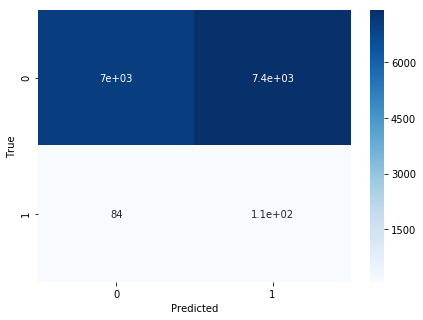

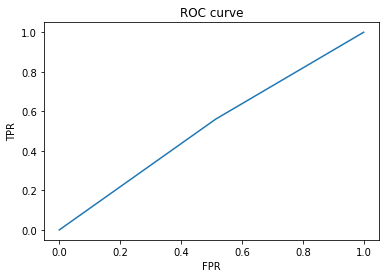

Precision Score = 1.42 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)%
On Sample - 
RandomUnderSampler(random_state=None, ratio='auto', replacement=False,
          return_indices=False)
             precision    recall  f1-score   support

          0       0.98      0.01      0.02     14435
          1       0.01      0.99      0.03       191

avg / total       0.97      0.02      0.02     14626

Precision Score: 0.013037180106228875
Recall Score: 0.9895287958115183
Roc Auc Score: 0.49916342804084746
Confusion Matrix:
 [[  127 14308]
 [    2   189]]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


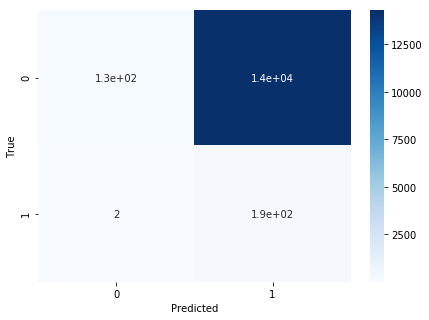

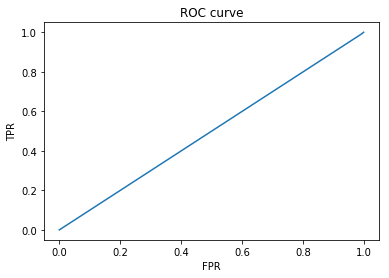

Precision Score = 1.30 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)%
On Sample - 
ClusterCentroids(estimator=None, n_jobs=1, random_state=None, ratio='auto',
         voting='auto')
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     14435
          1       0.00      0.00      0.00       191

avg / total       0.97      0.99      0.98     14626

Precision Score: 0.0
Recall Score: 0.0
Roc Auc Score: 0.5
Confusion Matrix:
 [[14435     0]
 [  191     0]]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


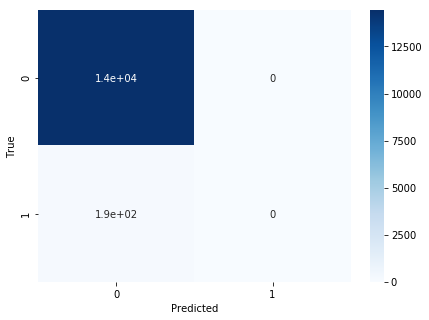

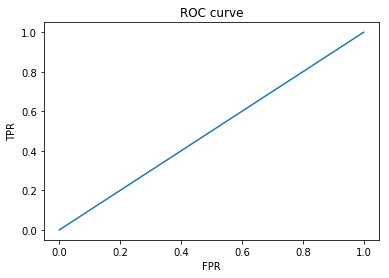

Precision Score = 0.00 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)%
On Sample - 
TomekLinks(n_jobs=1, random_state=None, ratio='auto', return_indices=False)


In [26]:
# Grouping & LE+OHO with Under sampling xgb separately since it throws a mismatch error due to a bug
xgb = XGBClassifier()
for sample in under_sampling:
    X_train2,y_train2 = sample.fit_sample(X_train,y_train)
    X_test2 = X_test.values
    xgb.fit(X_train2,y_train2)
    y_scores = xgb.predict(X_test2)
    precision = precision_score(y_test, y_scores)
    confusion = confusion_matrix(y_test, y_scores)
    print(classification_report(y_test,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
    print('Precision Score:',precision_score(y_test, y_scores))
    print('Recall Score:',recall_score(y_test, y_scores))
    print('Roc Auc Score:',roc_auc_score(y_test,y_scores))
    print('Confusion Matrix:\n',confusion)
    plt.figure(figsize = (7,5))
    sns.heatmap(confusion, annot=True,cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
    print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(xgb)+'%\nOn Sample - \n'+str(sample))
    print('===='*20)

In [98]:
# Grouping & LE+OHO with Over sampling
for model in model_list2:
    for sample in over_sampling:
        X_train2,y_train2 = sample.fit_sample(X_train,y_train)
        precision = run_model(X_train2,X_test,y_train2,y_test,model)
        print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(model)+'%\nOn Sample - \n'+str(sample))
    
        print('===='*20)


NameError: name 'over_sampling' is not defined

In [97]:
# Grouping & LE+OHO with Over sampling xgb separately since it throws a mismatch error due to a bug
xgb = XGBClassifier()
for sample in over_sampling:
    X_train2,y_train2 = sample.fit_sample(X_train,y_train)
    X_test2 = X_test.values
    xgb.fit(X_train2,y_train2)
    y_scores = xgb.predict(X_test2)
    precision = precision_score(y_test, y_scores)
    confusion = confusion_matrix(y_test, y_scores)
    print(classification_report(y_test,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
    print('Precision Score:',precision_score(y_test, y_scores))
    print('Recall Score:',recall_score(y_test, y_scores))
    print('Roc Auc Score:',roc_auc_score(y_test,y_scores))
    print('Confusion Matrix:\n',confusion)
    plt.figure(figsize = (7,5))
    sns.heatmap(confusion, annot=True,cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
    print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(xgb)+'%\nOn Sample - \n'+str(sample))
    print('===='*20)
    

NameError: name 'XGBClassifier' is not defined

In [101]:
#LE + Log Tranformation + Scaling
def Log_Scalar_Encode(df):
    num_col = ['Duration','Net Sales', 'Commision (in value)', 'Age']  
#Since Net Sales have negative values
    scaler = StandardScaler()
    for col in num_col:
        if col == 'Net Sales':
            df[col] = np.log1p(389+df[col])
        else:
            df[col] = np.log1p(df[col])
    scaler.fit(X_2[num_col])
    df[num_col] = scaler.transform(df[num_col])
#Label Encoding
    le = LabelEncoder()
    for cols in categorical_columns:
        le.fit(X_2[cols])
        df[cols] = le.transform(df[cols])
    return df
X_3 = Log_Scalar_Encode(X_2)
X_3.head()
#Train test split
X_train,X_test,y_train, y_test = train_test_split(X_3,y_2,test_size=0.3,random_state=0)

C:\Users\vkrishna\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log1p
  # Remove the CWD from sys.path while we load stuff.


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
for model in model_list2:
    for sample in under_sampling:
        X_train2,y_train2 = sample.fit_sample(X_train,y_train)
        precision = run_model(X_train2,X_test,y_train2,y_test,model)
        print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(model)+'%\nOn Sample - \n'+str(sample))
    
        print('===='*20)

             precision    recall  f1-score   support

          0       1.00      0.72      0.83     14435
          1       0.03      0.75      0.06       191

avg / total       0.98      0.72      0.82     14626

Precision Score: 0.03381414045873729
Recall Score: 0.7486910994764397
Roc Auc Score: 0.7328145486990789
Confusion Matrix:
 [[10349  4086]
 [   48   143]]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


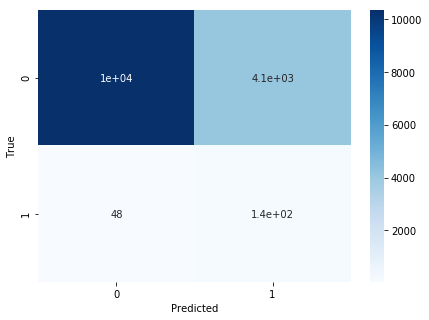

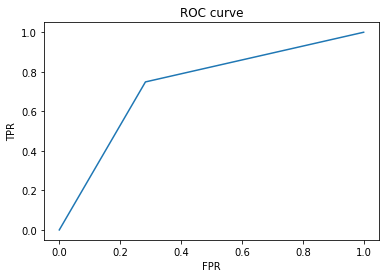

Precision Score = 3.38 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)%
On Sample - 
RandomUnderSampler(random_state=None, ratio='auto', replacement=False,
          return_indices=False)
             precision    recall  f1-score   support

          0       0.99      0.21      0.34     14435
          1       0.01      0.88      0.03       191

avg / total       0.98      0.21      0.34     14626

Precision Score: 0.014526388172597559
Recall Score: 0.8848167539267016
Roc Auc Score: 0.54528333366581
Confusion Matrix:
 [[ 2970 11465]
 [   22   169]]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


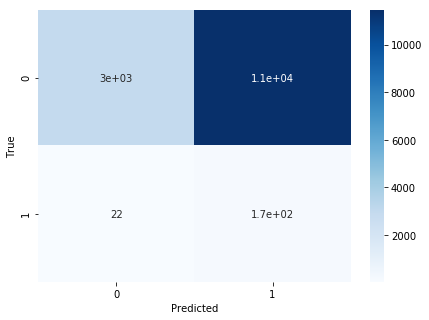

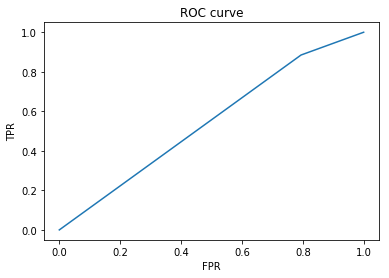

Precision Score = 1.45 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)%
On Sample - 
ClusterCentroids(estimator=None, n_jobs=1, random_state=None, ratio='auto',
         voting='auto')
             precision    recall  f1-score   support

          0       0.99      1.00      0.99     14435
          1       0.00      0.00      0.00       191

avg / total       0.97      0.99      0.98     14626

Precision Score: 0.0
Recall Score: 0.0
Roc Auc Score: 0.5
Confusion Matrix:
 [[14435     0]
 [  191     0]]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


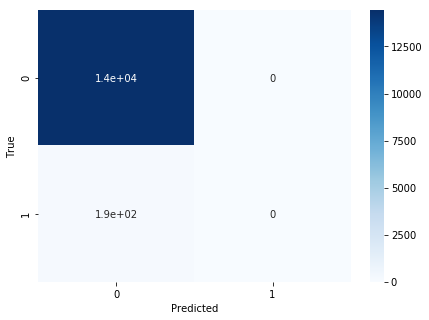

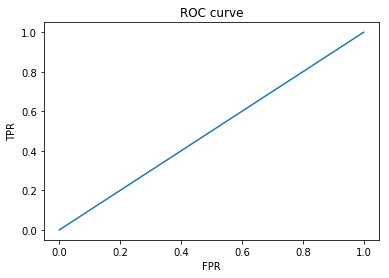

Precision Score = 0.00 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)%
On Sample - 
TomekLinks(n_jobs=1, random_state=None, ratio='auto', return_indices=False)


In [112]:
#Running xgb separately since it throws a mismatch error due to a bug
xgb = XGBClassifier()
for sample in under_sampling:
    X_train2,y_train2 = sample.fit_sample(X_train,y_train)
    X_test2 = X_test.values
    xgb.fit(X_train2,y_train2)
    y_scores = xgb.predict(X_test2)
    precision = precision_score(y_test, y_scores)
    confusion = confusion_matrix(y_test, y_scores)
    print(classification_report(y_test,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
    print('Precision Score:',precision_score(y_test, y_scores))
    print('Recall Score:',recall_score(y_test, y_scores))
    print('Roc Auc Score:',roc_auc_score(y_test,y_scores))
    print('Confusion Matrix:\n',confusion)
    plt.figure(figsize = (7,5))
    sns.heatmap(confusion, annot=True,cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
    print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(xgb)+'%\nOn Sample - \n'+str(sample))
    print('===='*20)

In [ ]:
for model in model_list2:
    for sample in over_sampling:
        X_train2,y_train2 = sample.fit_sample(X_train,y_train)
        precision = run_model(X_train2,X_test,y_train2,y_test,model)
        print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(model)+'%\nOn Sample - \n'+str(sample))
    
        print('===='*20)

             precision    recall  f1-score   support

          0       0.99      0.79      0.88     14435
          1       0.04      0.65      0.08       191

avg / total       0.98      0.79      0.87     14626

Precision Score: 0.04043998705920414
Recall Score: 0.6544502617801047
Roc Auc Score: 0.724488726317832
Confusion Matrix:
 [[11469  2966]
 [   66   125]]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


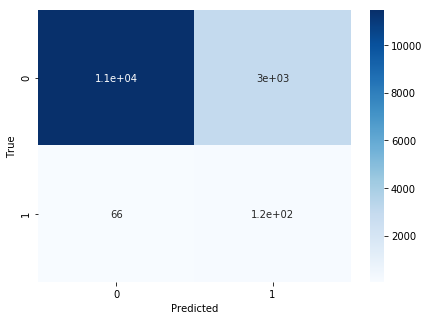

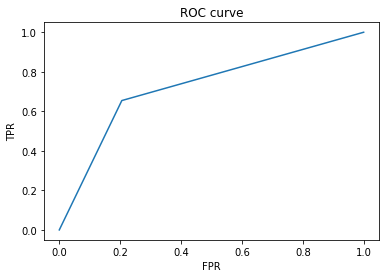

Precision Score = 4.04 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)%
On Sample - 
RandomOverSampler(random_state=None, ratio='auto')
             precision    recall  f1-score   support

          0       0.99      0.80      0.89     14435
          1       0.04      0.68      0.08       191

avg / total       0.98      0.80      0.88     14626

Precision Score: 0.04247612775765558
Recall Score: 0.675392670157068
Roc Auc Score: 0.7369689363947792
Confusion Matrix:
 [[11527  2908]
 [   62   129]]


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


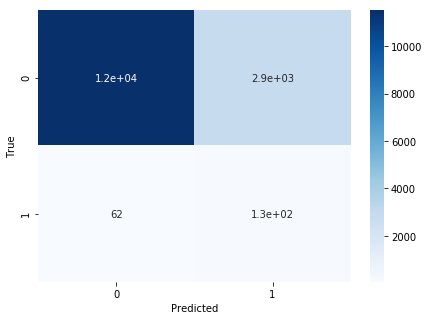

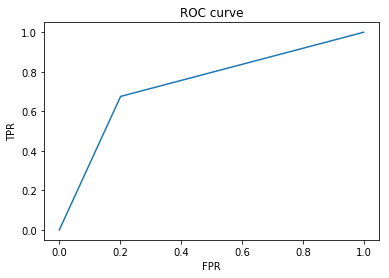

Precision Score = 4.25 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)%
On Sample - 
SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None)


In [114]:
#Running xgb separately since it throws a mismatch error due to a bug
xgb = XGBClassifier()
for sample in over_sampling:
    X_train2,y_train2 = sample.fit_sample(X_train,y_train)
    X_test2 = X_test.values
    xgb.fit(X_train2,y_train2)
    y_scores = xgb.predict(X_test2)
    precision = precision_score(y_test, y_scores)
    confusion = confusion_matrix(y_test, y_scores)
    print(classification_report(y_test,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
    print('Precision Score:',precision_score(y_test, y_scores))
    print('Recall Score:',recall_score(y_test, y_scores))
    print('Roc Auc Score:',roc_auc_score(y_test,y_scores))
    print('Confusion Matrix:\n',confusion)
    plt.figure(figsize = (7,5))
    sns.heatmap(confusion, annot=True,cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
    print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(xgb)+'%\nOn Sample - \n'+str(sample))
    print('===='*20)

In [ ]:
smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train,y_train)

In [ ]:
def grid_search_random_forest(dataframe,target):
    gbc = GradientBoostingClassifier()
    param_grid = { 
    'learning_rate': [0.1],
    'min_samples_split': [500, 400, 300, 200],
    'min_samples_leaf': [50, 40, 30, 20],
    'max_depth': [5,6,7,8],
    'max_features':['sqrt','log2','auto'],
    #'subsample':[0.8]
    }
    grid_search_model = GridSearchCV(gbc, param_grid=param_grid,scoring = 'roc_auc')
    grid_search_model.fit(dataframe, target)
    
    return grid_search_model.best_params_

print('Best Parameters are:')
print(grid_search_random_forest(X_train,y_train))

In [ ]:
gbc_grid = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 8, min_samples_leaf= 5, min_samples_split= 200,random_state=0)
precision = run_model(X_train,X_test,y_train,y_test,gbc_grid)
print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(model))
print('===='*20)

In [75]:
Y_test = pd.read_csv(r'C:\Users\vkrishna\data\test.csv')
Y_test[['ID']].to_csv(r'C:\Users\vkrishna\data\test_ID.csv')

In [76]:
Y_test = Y_test.drop('Gender',1)

In [78]:
#LE + Log Tranformation + Scaling
Y_test = Log_Scalar_Encode(Y_test)
Y_test.head()

NameError: name 'Log_Scalar_Encode' is not defined

In [ ]:
missing_data = missing_datas(Y_test)
print(missing_data)
print(np.isfinite)